# Requirements

In [2]:
import os, sys

pkg_path = 'D:\\Projects\\System_Trading\\JnQ_32bit\\'

os.chdir(pkg_path)

# mpl_finance_path = 'D:\\python\\python38_1\\projects\\JnQ\\mpl_finance'
# ta_lib_path = 'D:\\python\\python38_1\\projects\\JnQ\\ta_lib'
funcs_path = pkg_path + 'funcs'

if funcs_path not in sys.path:

  try:
    # sys.path.insert(0, '/content/drive/My Drive/Colab Notebooks/JnQ')
    sys.path.insert(0, pkg_path + 'Bank')
    sys.path.insert(0, funcs_path)
    # sys.path.insert(0, mpl_finance_path)
    # sys.path.insert(0, ta_lib_path)
    
  except Exception as e:
    print(e)

In [3]:
import os
import talib
# from funcs.public.idep import *
# from funcs.public.plot_check import *
# from funcs.public.en_ex_pairing import *
from funcs.public.indicator import *
from funcs.public.broker import *
# from funcs.public.ds import *
from ast import literal_eval
import logging
import importlib


import matplotlib.pyplot as plt
from matplotlib import gridspec

# import torch

import numpy as np
import pandas as pd
import scipy.stats as stats
# from sklearn.metrics.pairwise import cosine_similarity

# import bz2
import pickle
# import _pickle as cPickle
import shutil
import json
from easydict import EasyDict
import copy

import datetime
from datetime import datetime
import random
import time
# import warnings

from IPython.display import clear_output
# warnings.simplefilter("ignore", category=RuntimeWarning)

np.seterr(invalid="ignore")
np.set_printoptions(suppress=True)
np.set_printoptions(linewidth=2000) 

pd.set_option('mode.chained_assignment',  None)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Get data

## Stock

In [3]:
from funcs.cybos.cybos_module import CybosModule

In [4]:
cybos = CybosModule()

kill exist connection.
connect to a new Cybos server.
waiting for Cybos connection.
waiting for Cybos connection.
waiting for Cybos connection.
waiting for Cybos connection.
waiting for Cybos connection.
waiting for Cybos connection.
waiting for Cybos connection.
waiting for Cybos connection.


In [7]:

days = 5  # 330 3

end_date = None  # None 2023-07-04 # "2023-01-06" "2021-04-12" "2021-03-23"
if end_date is None:
    end_date = str(datetime.now()).split(' ')[0]
    
intervals = ['1d']  # ['1m', '3m', '5m', '15m', '30m', '1h', '4h'] - old
# intervals = ['15m', '30m', '1h', '4h', '1d']  # ['1m', '3m', '5m', '15m', '30m', '1h', '4h'] - old

limit = 1500
    
show_process = False
show_process = True


 
# symbol_list = [s_['symbol'] for s_ in um_futures_client.exchange_info()['symbols']]
symbol_list = cybos.CpCodeMgr.GetStockListByMarket(2)


target_symbol_total = []
for interval in intervals:
    
    target_symbol = []
    for s_i, symbol in enumerate(symbol_list):
        
        print("s_i :", s_i)
        
        # if 'KRW' not in symbol:
        #     continue
        
        # print("itv_to_number(interval) :", itv_to_number(interval))
        # break
        
        try:
            concated_df = cybos.concat_candlestick_cybos(symbol, period=itv_to_number(interval), count=6000, adjusted=0)
            
            price_fluctuation = concated_df.close / concated_df.close.shift(1)
            
            # display(concated_df.head())
            display(price_fluctuation)
            # print("len(concated_df) :", len(concated_df))
            break
            
            concated_df2 = fisher_v2(concated_df, 30, itv=interval.upper())      
            # display(concated_df2.tail())
            # break
            
            target_data = concated_df2.iloc[-2:, -1].to_numpy()
            
            """
            condition
            """
            # 1. fisher band
            fisher_lower = -1.5
            if target_data[0] < fisher_lower < target_data[1]:
                target_symbol.append(symbol)
                
            clear_output(wait=True)          
            
            
            
            # break
            # save_path = os.path.join(save_dir, save_name)
            # concated_df.reset_index().to_feather(save_path, compression='lz4')
            # print(save_path, "saved.\n")
        except Exception as e:
            print("error in save to_feather :", e)
            continue
     
    target_symbol_total.append([s_ for s_ in target_symbol])
    print("target_symbol_total :", target_symbol_total)
    # break

s_i : 0


2018-12-12 15:30:00         NaN
2018-12-13 15:30:00    1.002384
2018-12-14 15:30:00    0.953627
2018-12-17 15:30:00    0.921446
2018-12-18 15:30:00    0.982409
                         ...   
2024-01-02 15:30:00    1.033635
2024-01-03 15:30:00    0.988736
2024-01-04 15:30:00    0.941772
2024-01-05 15:30:00    1.010753
2024-01-08 15:30:00    1.049202
Name: close, Length: 1250, dtype: float64

target_symbol_total : [[]]


In [14]:
df_res = pd.DataFrame(index=intervals, data=target_symbol_total)
df_res

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
15m,A010240,A014970,A021080,A041440,A047080,A059090,A064260,A065130,A066700,A094860,A096690,A096870,A099220,A106080,A181340,A199730,A203690,A215790,A219550,A223250,A251970,A263920,A299660,A308100,A311390,A332570,A333430,A347700,A376190,A408920,A432720,A433530,A452160
30m,A005990,A007390,A007820,A008470,A014940,A025440,A057880,A085810,A088280,A091700,A094360,A100700,A121800,A213420,A241790,A263690,A291650,A448830,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1h,A007330,A008830,A009780,A028300,A053300,A053980,A056700,A095340,A117730,A137400,A191410,A241790,A299030,A320000,A388720,A425420,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4h,A037230,A041020,A065950,A079190,A096630,A103230,A110020,A148150,A237750,A317330,A340570,A356680,A357230,A393210,A393890,A446540,A950130,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1d,A012620,A030960,A033320,A060150,A065370,A065440,A101490,A110990,A114630,A115570,A119830,A122350,A187660,A189330,A204840,A322780,A331520,A336060,A348080,A365590,A373170,A377400,A402030,A413640,A418470,None,None,None,None,None,None,None,None


In [28]:
df_res.to_excel("signal/kosdaq_res.xlsx")

### timeline strategy

#### save database

In [40]:
database_dir_path = "D:\Projects\Rich\Cmong\Stock\database\my"


days = 5  # 330 3
count = 3000

end_date = None  # None 2023-07-04 # "2023-01-06" "2021-04-12" "2021-03-23"
if end_date is None:
    end_date = str(datetime.now()).split(' ')[0]
    
intervals = ['1d']  # ['1m', '3m', '5m', '15m', '30m', '1h', '4h'] - old
# intervals = ['15m', '30m', '1h', '4h', '1d']  # ['1m', '3m', '5m', '15m', '30m', '1h', '4h'] - old

    
show_process = False
show_process = True


 
# symbol_list = [s_['symbol'] for s_ in um_futures_client.exchange_info()['symbols']]
symbol_list = cybos.CpCodeMgr.GetStockListByMarket(2)


target_symbol_total = []
for interval in intervals:
    
    # target_symbol = []
    df_fluc_list = []
    for s_i, symbol in enumerate(symbol_list):
        
        print("s_i :", s_i)
        
        # if 'KRW' not in symbol:
        #     continue
        
        # print("itv_to_number(interval) :", itv_to_number(interval))
        # break
        
        try:
            concated_df = cybos.concat_candlestick_cybos(symbol, period=itv_to_number(interval), count=10000, adjusted=0)            
                  
            save_path = os.path.join(database_dir_path, "{} {}_{}.xlsx".format(end_date, symbol, interval))
            concated_df.to_excel(save_path)
            print(save_path, "saved.")
#             display(concated_df.head())
#             break
            
#             price_fluctuation = concated_df.close / concated_df.close.shift(1)  
#             price_fluctuation.name = symbol
#             df_fluc_list.append(price_fluctuation)    
            # display(price_fluctuation)
            # # print("len(concated_df) :", len(concated_df))
            
            # if s_i > 5:
            #     break
            
#             concated_df2 = fisher_v2(concated_df, 30, itv=interval.upper())      
#             # display(concated_df2.tail())
#             # break
            
#             target_data = concated_df2.iloc[-2:, -1].to_numpy()
            
#             """
#             condition
#             """
#             # 1. fisher band
#             fisher_lower = -1.5
#             if target_data[0] < fisher_lower < target_data[1]:
#                 target_symbol.append(symbol)  
                
            clear_output(wait=True) 
            
            # break
            # save_path = os.path.join(save_dir, save_name)
            # concated_df.reset_index().to_feather(save_path, compression='lz4')
            # print(save_path, "saved.\n")
            
        except Exception as e:
            print("error in save to_feather :", e)
            continue
     

s_i : 1702
D:\Projects\Rich\Cmong\Stock\database\my\2024-01-08 A950220_1d.xlsx saved.


#### load database

In [4]:
database_dir_path = "D:\Projects\Rich\Cmong\Stock\database\my"

In [ ]:
df_list = []
df_name_list = []
df_fluc_list = []

for p_i, pkl in enumerate(os.listdir(database_dir_path)):
    
    print(p_i)
    df = pd.read_excel(os.path.join(database_dir_path, pkl), index_col=0)
    # display(df.head())
    # break
    
    price_fluctuation = df.close / df.close.shift(1)  
    price_fluctuation.name = p_i
    
    df_list.append(df)
    df_name_list.append(pkl)
    df_fluc_list.append(price_fluctuation)
    
    if p_i > 100:
        break
    
                  
    clear_output(wait=True)

#### get top rank

In [6]:
df_flucs_rank = pd.concat(df_fluc_list, axis=1).rank(ascending=False, method='first',  axis=1)

top_rank = 10
df_buy = df_flucs_rank <= top_rank

#### adj. strategy

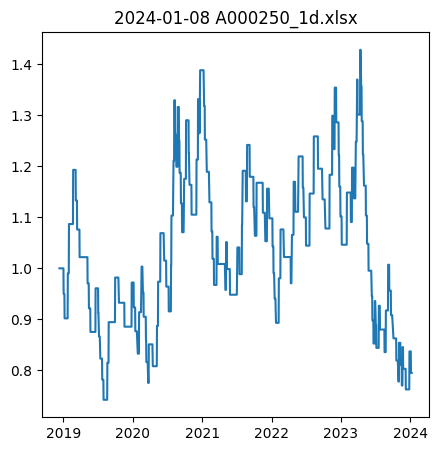

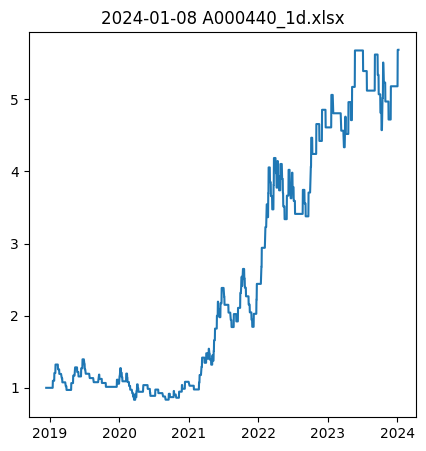

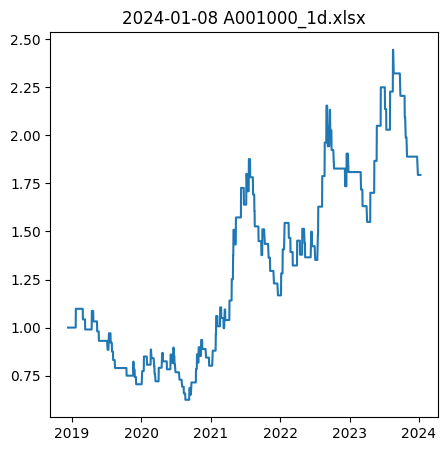

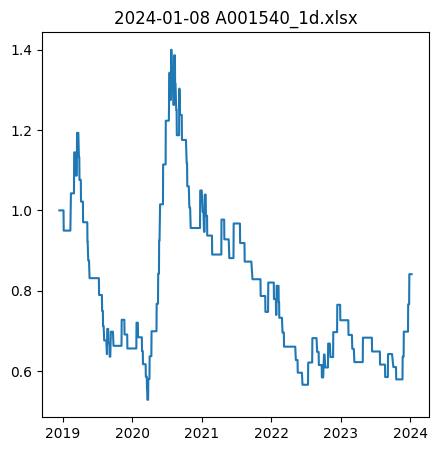

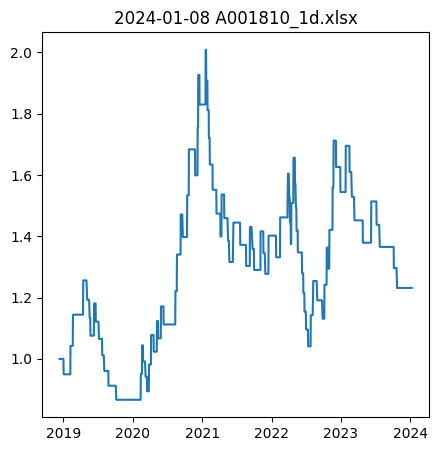

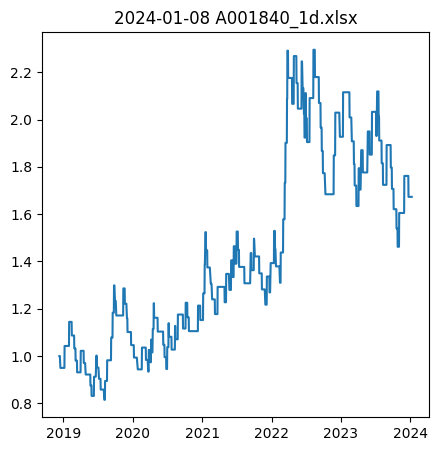

KeyboardInterrupt: 

In [9]:
take_profit = 1.1  # 10%
stop_loss = 0.95   # -5%

fees = 0.00015 + 0.00015  # 0.015% 수수료

save_path = database_dir_path.replace('database', 'result')


col_i = 0  # symbol_index
for col_i in range(len(df_fluc_list)):

    en_ex_total = []
    en_ex = []

    for row, signal in zip(df_list[col_i].iterrows(), df_buy.iloc[:, col_i]):

        en_ex_len = len(en_ex)

        # 1. check buy signal.
        if signal and en_ex_len == 0:
            en_ex.append(row[-1].name)
            en_ex.append(row[-1]['close'])
        # 2. check sell signal.
        if en_ex_len > 0:

            exit_done = 0

            # a. take_profit
            if row[-1]['high'] / en_ex[1] >= take_profit:
                profit = take_profit * (1 - fees - 0.0018) # 증권거래세 등(0.18%)
                exit_done = 1
            elif row[-1]['low'] / en_ex[1] <= stop_loss:
                profit = stop_loss * (1 - fees)
                exit_done = -1

            if exit_done:
                en_ex.append(row[-1].name)
                en_ex.append(exit_done)
                en_ex.append(profit)
                en_ex_total.append(en_ex)
                en_ex = []


    en_ex_total_arr = np.array(en_ex_total, dtype=object)


    df_list[col_i]['buy'] = np.nan
    df_list[col_i]['sell'] = np.nan
    df_list[col_i]['profit'] = np.nan
    df_list[col_i]['profit_cum'] = 1

    df_list[col_i]['buy'].loc[en_ex_total_arr[:, 0]] = 1
    df_list[col_i]['sell'].loc[en_ex_total_arr[:, 2]] = en_ex_total_arr[:, 3]
    df_list[col_i]['profit'].loc[en_ex_total_arr[:, 2]] = en_ex_total_arr[:, 4]
    df_list[col_i]['profit_cum'].loc[en_ex_total_arr[:, 2]] = en_ex_total_arr[:, 4]
    df_list[col_i]['profit_cum'] = np.cumprod(df_list[col_i]['profit_cum'])

    # display(df_list[col_i])

    plt.figure(figsize=(5,5))
    plt.plot(df_list[col_i]['profit_cum'])
    plt.title(df_name_list[col_i])
    plt.show()
    
    df_list[col_i].to_excel(os.path.join(save_path, '{}'.format(df_name_list[col_i])), index=False)
    # break

## Upbit

In [5]:
from funcs.upbit.concat_candlestick_ftr_v2 import concat_candlestick
from pyupbit import get_tickers

"""
1. upbit 에서 당일 기준 이전 데이터를 조회할지라도 None 은 성립하지 않는다. --> end_date = today 로 변경 요구.
"""


days = 1  # 330 3

end_date = None  # None 2023-07-04 # "2023-01-06" "2021-04-12" "2021-03-23"
if end_date is None:
    end_date = str(datetime.now()).split(' ')[0]
    
intervals = [ 'D']  # ['1m', '3m', '5m', '15m', '30m', '1h', '4h'] - old
intervals = ['30m', '1h', '2h']  # ['1m', '3m', '5m', '15m', '30m', '1h', '4h'] - old
intervals = [ '4h',  'D']  # ['1m', '3m', '5m', '15m', '30m', '1h', '4h'] - old
    
show_process = False
show_process = True


    
symbol_list = get_tickers()

target_symbol_total = []
for interval in intervals:
    
    target_symbol = []
    for s_i, symbol in enumerate(symbol_list):
        
        print(s_i)
        
        if 'KRW' not in symbol:
            continue
        
        try:
            concated_df, end_date = concat_candlestick(symbol, 
                                                       interval, 
                                                       days, 
                                                       limit=limit_by_itv(interval),
                                                       end_date=end_date, 
                                                       show_process=show_process, 
                                                       timesleep=0.1)
            
            
            concated_df2 = fisher_v2(concated_df, 30, itv=interval)    
            # display(concated_df2.tail())
            # break
            
            target_data = concated_df2.iloc[-2:, -1].to_numpy()
            
            """
            condition
            """
            # 1. fisher band
            fisher_lower = -1.5
            if target_data[0] < fisher_lower < target_data[1]:
                target_symbol.append(symbol)
                
            clear_output(wait=True)          
            
            
            
            # break
            # save_path = os.path.join(save_dir, save_name)
            # concated_df.reset_index().to_feather(save_path, compression='lz4')
            # print(save_path, "saved.\n")
        except Exception as e:
            print("error in save to_feather :", e)
            continue
     
    target_symbol_total.append([s_.replace('KRW-', '') for s_ in target_symbol])
    print("target_symbol_total :", target_symbol_total)
    # break

303
target_symbol_total : [[], []]


In [7]:
df_res = pd.DataFrame(index=intervals, data=target_symbol_total)
df_res

""
4h
D


In [ ]:
df_res.to_excel("signal/upbit_res.xlsx")

## Binance_Futures

In [183]:
# with open(r"D:\Projects\System_Trading\JnQ\Bank\tickers\binance_20240102.pkl", 'wb') as f:
#     pickle.dump(symbol_list, f)

In [3]:
from binance.um_futures import UMFutures
from funcs.binance.futures_concat_candlestick_ftr_v2 import *
# break


days = 5  # 330 3

end_date = None  # None 2023-07-04 # "2023-01-06" "2021-04-12" "2021-03-23"
if end_date is None:
    end_date = str(datetime.now()).split(' ')[0]
    
intervals = ['4h', '1d']  # ['1m', '3m', '5m', '15m', '30m', '1h', '4h'] - old
intervals = ['15m', '30m', '1h', '4h', '1d']  # ['1m', '3m', '5m', '15m', '30m', '1h', '4h'] - old

limit = 1500
    
show_process = False
show_process = True


 
symbol_list = [s_['symbol'] for s_ in um_futures_client.exchange_info()['symbols']]



target_symbol_total = []
for interval in intervals:
    
    target_symbol = []
    for s_i, symbol in enumerate(symbol_list):
        
        print(s_i)
        
        # if 'KRW' not in symbol:
        #     continue
        
        try:
            concated_df, end_date = concat_candlestick_v2(symbol, 
                                                          interval, 
                                                          days,
                                                          limit=limit,
                                                          end_date=None,
                                                          show_process=True,
                                                          timesleep=0.4)
            
            
            concated_df2 = fisher_v2(concated_df, 30, itv=interval.upper())      
            # display(concated_df2.tail())
            # break
            
            target_data = concated_df2.iloc[-2:, -1].to_numpy()
            
            """
            condition
            """
            # 1. fisher band
            fisher_lower = -1.5
            if target_data[0] < fisher_lower < target_data[1]:
                target_symbol.append(symbol)
                
            clear_output(wait=True)          
            
            
            
            # break
            # save_path = os.path.join(save_dir, save_name)
            # concated_df.reset_index().to_feather(save_path, compression='lz4')
            # print(save_path, "saved.\n")
        except Exception as e:
            print("error in save to_feather :", e)
            continue
     
    target_symbol_total.append([s_ + '.P' for s_ in target_symbol])
    # print("target_symbol_total :", target_symbol_total)
    # break

260
BTCUSDC
error in concat_candlestick_v2 : Length mismatch: Expected axis has 0 elements, new values have 5 elements
error in save to_feather : No objects to concatenate
261
ETHUSDC
error in concat_candlestick_v2 : Length mismatch: Expected axis has 0 elements, new values have 5 elements
error in save to_feather : No objects to concatenate
262
BNBUSDC
error in concat_candlestick_v2 : Length mismatch: Expected axis has 0 elements, new values have 5 elements
error in save to_feather : No objects to concatenate
263
SOLUSDC
error in concat_candlestick_v2 : Length mismatch: Expected axis has 0 elements, new values have 5 elements
error in save to_feather : No objects to concatenate
264
XRPUSDC
error in concat_candlestick_v2 : Length mismatch: Expected axis has 0 elements, new values have 5 elements
error in save to_feather : No objects to concatenate


In [4]:
df_res = pd.DataFrame(index=intervals, data=target_symbol_total)
df_res

,0,1,2
15m,GRTUSDT.P,KASUSDT.P,1000RATSUSDT.P
30m,None,None,None
1h,LTCUSDT.P,XMRUSDT.P,None
4h,None,None,None
1d,None,None,None


In [ ]:
df_res.to_excel("signal/binance_futures_res.xlsx")